In [1]:
#Importing the needed Liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm


import matplotlib.pyplot as plt #visualization
import warnings
warnings.filterwarnings("ignore") #Suppress the Future Warnings for a cleaner representation 
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
# Import math Library
import math 
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
#Import/Load the Data
DemandH = pd.read_csv("Demand_History.csv")
#A quick look into the data
DemandH.head(3).append(DemandH.tail(3))

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254
4093,4093,61.5,63.5,0.100895,0.180352,0.296299,0.705373,1.300220,1.608609,1.822806,2.333681,3.218519
4094,4094,62.5,63.5,0.155353,0.290825,0.557803,1.516066,2.399426,2.719197,4.494515,6.096858,6.262574
4095,4095,63.5,63.5,0.209372,0.340185,0.749491,1.904285,2.775772,3.404641,4.574922,6.301078,6.860939


In [3]:
#Import/Load the Data
SupplyH = pd.read_csv("exisiting_EV_infrastructure_2018.csv")
#A quick look into the data
SupplyH.head(3).append(SupplyH.tail(3))

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14
97,97,36.218839,22.235766,32,4,14
98,98,42.936915,38.122442,28,7,5
99,99,19.590263,3.830284,24,2,11


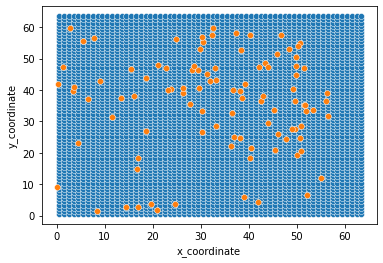

In [4]:
sns.scatterplot(DemandH.x_coordinate, DemandH.y_coordinate);
sns.scatterplot(SupplyH.x_coordinate, SupplyH.y_coordinate);

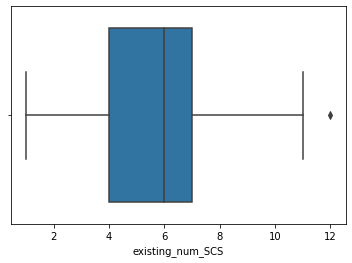

In [5]:
sns.boxplot(SupplyH.existing_num_SCS);

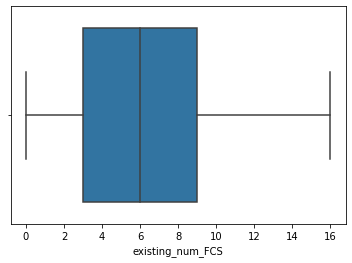

In [6]:
sns.boxplot(SupplyH.existing_num_FCS);

In [7]:
# Calculate Euclidean distance
print (math.dist(SupplyH.x_coordinate, SupplyH.y_coordinate)) 

219.04535765352549


In [8]:
#dist = euclidean_distances(SupplyH.x_coordinate, SupplyH.y_coordinate)

In [9]:
SupplyCoor = (SupplyH.x_coordinate, SupplyH.y_coordinate)
DemandCoor = [DemandH.x_coordinate, DemandH.y_coordinate]

In [10]:
print (SupplyH.x_coordinate)
print (SupplyH.y_coordinate)
#print (DemandCoor)

0     50.163110
1     37.336451
2     46.709232
3     30.528626
4     51.521781
        ...    
95    45.471204
96    30.318396
97    36.218839
98    42.936915
99    19.590263
Name: x_coordinate, Length: 100, dtype: float64
0     19.412014
1     58.119225
2     57.525650
3     55.379835
4     35.116755
        ...    
95    20.999414
96    33.388335
97    22.235766
98    38.122442
99     3.830284
Name: y_coordinate, Length: 100, dtype: float64


In [11]:
#dist = euclidean_distances(DemandCoor, SupplyCoor)

In [12]:
#dist

In [13]:
#print (A)

In [14]:
SupplyCoorx = np.array(SupplyH.x_coordinate)
SupplyCoory = np.array(SupplyH.y_coordinate)
print (SupplyCoory)

[19.41201447 58.11922465 57.52565043 55.37983538 35.11675545 59.70136475
 37.60749211 24.63367334 42.0262009  46.81531013  6.43888129 25.0374022
 38.19464918 32.55040832 36.36169094 31.6532909  55.12703383 37.5760323
 28.70683428 27.59814558 42.88436168 53.90933293 51.65154432 55.6093001
  2.60044971 57.66979052 52.8445835  24.86840897 39.15333532 39.04766355
 21.62338431 33.21646779 36.59499687 44.70415569 22.99221215 11.96746896
 37.17436042 26.86626418  1.31517572 28.55452057 27.62985572 40.78742556
 40.25090423 48.64574955 56.5579532  40.1369401  40.61401679 50.44335522
 40.24389798 42.76853671 26.56687365 39.7531005  56.8668828  47.48504683
 33.54635969 40.83671221 45.06347631  2.80366423 41.8961649  20.6674545
  1.84506346 59.78774145 46.37470886 53.07765932 31.36086093 35.65146012
 14.83442403 47.48297955 43.17732827 18.35718707 35.39985728 36.44787444
 57.65183063 33.69187574  3.78753958 46.45107301  4.25888625 24.49076987
 29.60958946 46.87583003 39.71265108 46.89401311 47.071

In [15]:
SupplyCoor = np.stack((SupplyCoorx, SupplyCoory), axis=1)

In [16]:
print (SupplyCoor)

[[50.1631097  19.41201447]
 [37.33645053 58.11922465]
 [46.70923189 57.52565043]
 [30.5286257  55.37983538]
 [51.52178093 35.11675545]
 [32.50820112 59.70136475]
 [38.60388019 37.60749211]
 [38.16235914 24.63367334]
 [39.21748351 42.0262009 ]
 [15.55427981 46.81531013]
 [52.21843818  6.43888129]
 [36.86098867 25.0374022 ]
 [16.04398971 38.19464918]
 [36.42321533 32.55040832]
 [56.02709707 36.36169094]
 [56.56800987 31.6532909 ]
 [50.709858   55.12703383]
 [13.30202264 37.5760323 ]
 [33.21623864 28.70683428]
 [49.73440989 27.59814558]
 [31.91338188 42.88436168]
 [50.18666036 53.90933293]
 [45.96042571 51.65154432]
 [ 5.41716076 55.6093001 ]
 [14.40580184  2.60044971]
 [32.31998033 57.66979052]
 [38.31131287 52.8445835 ]
 [50.62657355 24.86840897]
 [26.31297256 39.15333532]
 [56.40170339 39.04766355]
 [40.46800896 21.62338431]
 [51.85605436 33.21646779]
 [42.65671376 36.59499687]
 [49.88132548 44.70415569]
 [ 4.50108582 22.99221215]
 [54.98723895 11.96746896]
 [ 6.56514813 37.17436042]
 

In [17]:
#SupplyCoorx = np.array(SupplyH.x_coordinate)
#SupplyCoory = np.array(SupplyH.y_coordinate)
DemandCoor = np.stack((DemandH.x_coordinate, DemandH.y_coordinate), axis=1)

In [18]:
DemandCoor

array([[ 0.5,  0.5],
       [ 1.5,  0.5],
       [ 2.5,  0.5],
       ...,
       [61.5, 63.5],
       [62.5, 63.5],
       [63.5, 63.5]])

In [19]:
from scipy import spatial
pt = [6, 30]
A = np.random.random((10,2))*100
nodes = SupplyCoor[spatial.KDTree(SupplyCoor).query(DemandCoor)[1]]

In [20]:
nodes[125]

array([52.21843818,  6.43888129])

In [21]:
DemandH[['Supply_pt_x', 'Supply_pt_y']] = nodes

In [22]:
DemandH.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,Supply_pt_x,Supply_pt_y
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572,8.462964,1.315176
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091,8.462964,1.315176
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254,8.462964,1.315176
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302,8.462964,1.315176
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563,8.462964,1.315176


In [23]:
DemandH.to_excel("Demand_History_w_supp_pt.xlsx")

In [24]:
print ("Unique X Coor in Supply Pts:", SupplyH.x_coordinate.unique().shape)
print ("Unique X Coor Mapped with Demand Pts:", DemandH.Supply_pt_x.unique().shape)

Unique X Coor in Supply Pts: (100,)
Unique X Coor Mapped with Demand Pts: (100,)


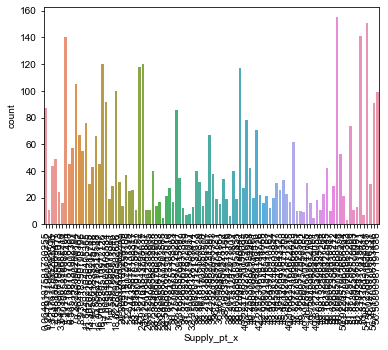

In [25]:
sns.countplot(DemandH.Supply_pt_x);
sns.set(rc={'figure.figsize':(24,8)});
plt.xticks(rotation=90);

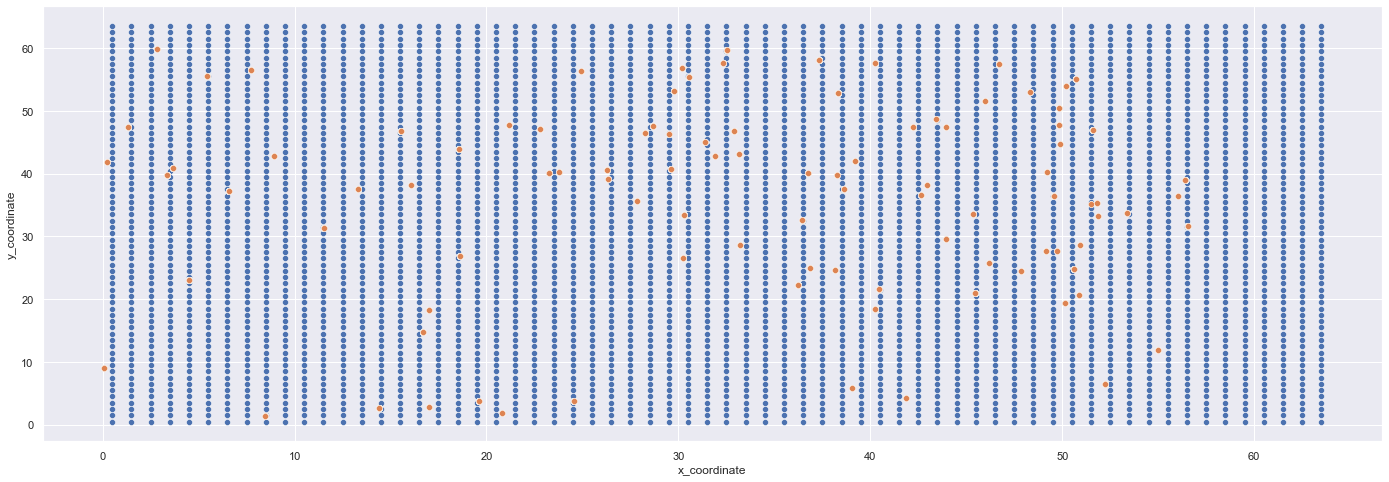

In [26]:
sns.scatterplot(DemandH.x_coordinate, DemandH.y_coordinate);
sns.scatterplot(DemandH.Supply_pt_x, DemandH.Supply_pt_y);
sns.set(rc={'figure.figsize':(32,32)});

In [27]:
Demand_per_Spt = DemandH.groupby('Supply_pt_x')['2018'].sum()
DemandPts_per_Spt = DemandH.groupby('Supply_pt_x')['2018'].count()
#DemandH.Supply_pt_x.unique().DemandH['2018'].sum()

In [28]:
Demand_per_Spt.describe()

count      100.000000
mean      3615.296366
std       2628.949210
min         62.696096
25%       1814.400025
50%       3010.291038
75%       4634.335074
max      14966.173401
Name: 2018, dtype: float64

In [29]:
DemandPts_per_Spt.describe()

count    100.000000
mean      40.960000
std       36.642945
min        3.000000
25%       15.750000
50%       27.000000
75%       53.500000
max      155.000000
Name: 2018, dtype: float64

In [30]:
SupplyH = SupplyH.sort_values('x_coordinate')

In [31]:
SupplyH.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
88,88,0.064819,9.008559,17,4,1
58,58,0.247971,41.896165,20,8,3
84,84,1.323761,47.357344,8,5,2
61,61,2.848186,59.787741,11,3,0
51,51,3.353976,39.753100,12,4,1


In [32]:
Demand_per_Spt.to_csv("Demand_per_Spt.csv")

In [33]:
DemandPts_per_Spt.to_csv("DemandPts_per_Spt.csv")

### Manually Merged the above csvs to exisiting_EV_infrastructure_2018_w_demand_cnt.csv

In [34]:
#Import/Load the Data
SupplyH_1 = pd.read_csv("exisiting_EV_infrastructure_2018_w_demand_cnt.csv")
#A quick look into the data
SupplyH_1.head(3).append(SupplyH_1.tail(3))

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,2018_Demand_Sum,2018_Demand_pts_cnt
0,88,0.064819,9.008559,17,4,1,2670.127274,87
1,58,0.247971,41.896165,20,8,3,610.712814,11
2,84,1.323761,47.357344,8,5,2,1267.810830,44
97,14,56.027097,36.361691,30,4,12,4420.013982,30
98,29,56.401703,39.047664,28,6,3,6245.673293,91
99,15,56.568010,31.653291,24,5,6,7937.872599,99


In [35]:
SupplyH_1['total_CS'] = SupplyH_1.existing_num_FCS + SupplyH_1.existing_num_SCS

In [36]:
SupplyH_1.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,2018_Demand_Sum,2018_Demand_pts_cnt,total_CS
0,88,0.064819,9.008559,17,4,1,2670.127274,87,5
1,58,0.247971,41.896165,20,8,3,610.712814,11,11
2,84,1.323761,47.357344,8,5,2,1267.810830,44,7
3,61,2.848186,59.787741,11,3,0,62.696096,49,3
4,51,3.353976,39.753101,12,4,1,769.621518,24,5


CAP_SCS = Charging capacity of a slow charging station = 200

CAP_FCS = Charging capacity of a fast charging station = 400

SMax = Maximum supply that can be given from supply point = (existing_num_SCS * CAP_SCS) + (existing_num_FCS * CAP_FCS)

In [37]:
CAP_SCS = 200
CAP_FCS = 400
SupplyH_1['SMax'] = (SupplyH_1.existing_num_SCS * CAP_SCS) + (SupplyH_1.existing_num_FCS * CAP_FCS)

In [38]:
SupplyH_1['UnMet_Demand'] = SupplyH_1.SMax - SupplyH_1['2018_Demand_Sum']

In [39]:
SupplyH_1.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,2018_Demand_Sum,2018_Demand_pts_cnt,total_CS,SMax,UnMet_Demand
0,88,0.064819,9.008559,17,4,1,2670.127274,87,5,1200,-1470.127274
1,58,0.247971,41.896165,20,8,3,610.712814,11,11,2800,2189.287186
2,84,1.323761,47.357344,8,5,2,1267.810830,44,7,1800,532.189170
3,61,2.848186,59.787741,11,3,0,62.696096,49,3,600,537.303904
4,51,3.353976,39.753101,12,4,1,769.621518,24,5,1200,430.378482


In [40]:
SupplyH_1['Utilisation_perc'] = SupplyH_1['2018_Demand_Sum']/SupplyH_1.SMax * 100

In [41]:
SupplyH_1.head()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,2018_Demand_Sum,2018_Demand_pts_cnt,total_CS,SMax,UnMet_Demand,Utilisation_perc
0,88,0.064819,9.008559,17,4,1,2670.127274,87,5,1200,-1470.127274,222.510606
1,58,0.247971,41.896165,20,8,3,610.712814,11,11,2800,2189.287186,21.811172
2,84,1.323761,47.357344,8,5,2,1267.810830,44,7,1800,532.189170,70.433935
3,61,2.848186,59.787741,11,3,0,62.696096,49,3,600,537.303904,10.449349
4,51,3.353976,39.753101,12,4,1,769.621518,24,5,1200,430.378482,64.135127


In [42]:
greaterthan_eighty = (SupplyH_1['Utilisation_perc'] > 80)

In [43]:
greaterthan_eighty.value_counts()

False    53
True     47
Name: Utilisation_perc, dtype: int64

In [44]:
lessthan_thirty = (SupplyH_1['Utilisation_perc'] < 30)

In [45]:
lessthan_thirty.value_counts()

False    84
True     16
Name: Utilisation_perc, dtype: int64

In [46]:
SupplyH_1['Utilisation_perc'].describe()

count    100.000000
mean     128.862596
std      131.714745
min        9.057046
25%       44.283329
50%       75.221925
75%      157.029177
max      623.590558
Name: Utilisation_perc, dtype: float64

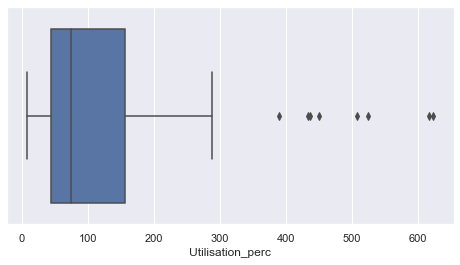

In [47]:
sns.set(rc={'figure.figsize':(8,4)});
sns.boxplot(SupplyH_1['Utilisation_perc']);

In [48]:
SupplyH_1['2018_Demand_Sum'].sum()

361529.6365938701

In [49]:
SupplyH_1.SMax.sum() - SupplyH_1['2018_Demand_Sum'].sum()

70.36340612987988

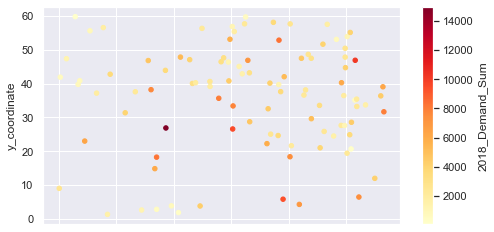

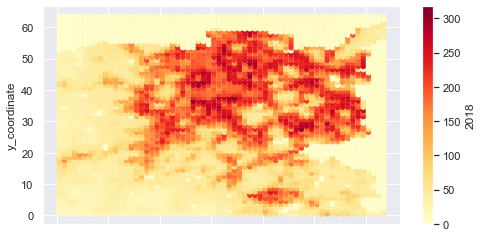

In [50]:
SupplyH_1.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="2018_Demand_Sum", colormap="YlOrRd");
DemandH.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="2018", colormap="YlOrRd");

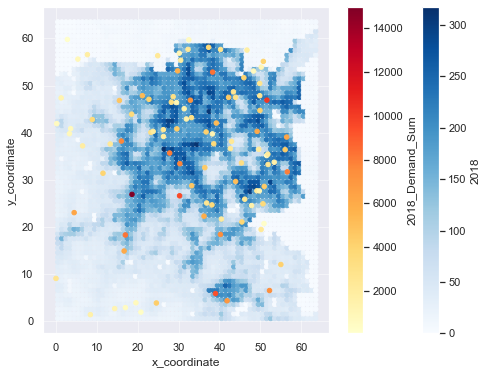

In [51]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))# plot map on axis
DemandH.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="2018", colormap="Blues", ax=ax)
SupplyH_1.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="2018_Demand_Sum", colormap="YlOrRd", ax=ax)# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

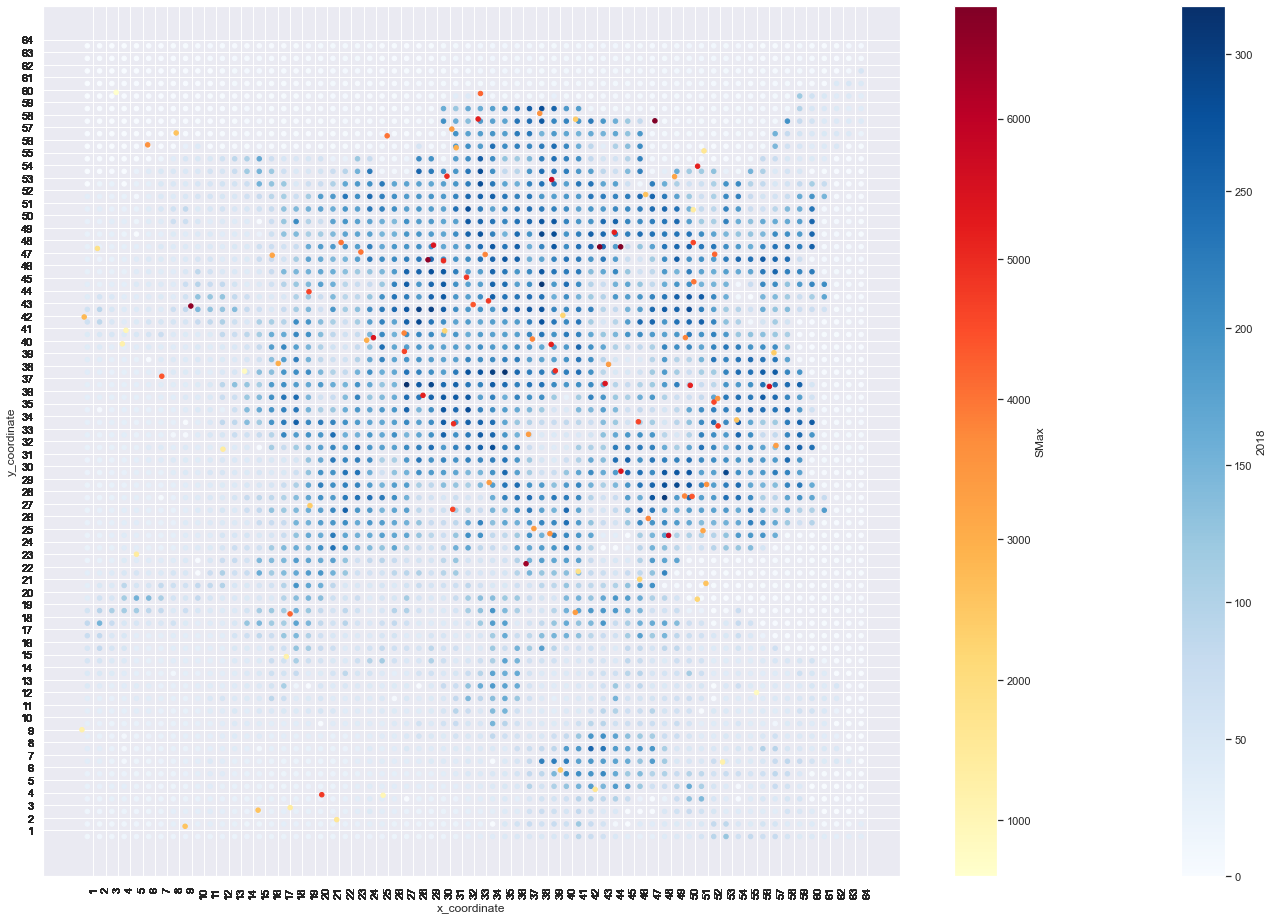

In [52]:
# initialize an axis
fig, ax = plt.subplots(figsize=(24,16))# plot map on axis
DemandH.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="2018", colormap="Blues", ax=ax)
SupplyH_1.plot(x="x_coordinate", y="y_coordinate", kind="scatter", c="SMax", colormap="YlOrRd", ax=ax)# add grid
ax.grid(b=True, alpha=0.5)
ax.set_xticks((DemandH.x_coordinate+0.5))
ax.set_yticks((DemandH.y_coordinate+0.5))
plt.xticks(rotation=90);
plt.show()

In [53]:
DemandH.head()

,demand_point_index,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,Supply_pt_x,Supply_pt_y
0,0,0.5,0.5,0.352242,0.667932,0.958593,2.911901,4.338274,6.561995,8.454417,10.595324,13.119572,8.462964,1.315176
1,1,1.5,0.5,0.325940,0.591964,0.862652,2.589068,4.196034,5.745551,8.753195,11.126995,12.020091,8.462964,1.315176
2,2,2.5,0.5,0.373752,0.591890,0.969733,2.641432,3.541772,5.469161,8.414627,10.115336,14.018254,8.462964,1.315176
3,3,3.5,0.5,0.420686,0.584055,0.906547,2.378577,3.888121,5.846089,9.083868,12.424885,15.012302,8.462964,1.315176
4,4,4.5,0.5,0.475621,0.647940,0.981544,2.665400,4.218711,6.776609,8.851107,11.731131,16.355563,8.462964,1.315176


In [54]:
#Dropping demand_point_index
DemandH.drop(['demand_point_index'], axis = 1, inplace = True)

In [55]:
#DemandH.drop(['Supply_pt_x'], axis = 1, inplace = True)
DemandH.drop(['Supply_pt_y'], axis = 1, inplace = True)

## Training & Test Data Split

In [56]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
DemandH_train, DemandH_test = train_test_split(DemandH, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
print ("Train:", DemandH_train.shape)
print ("\nTest:", DemandH_test.shape)

Train: (2867, 12)

Test: (1229, 12)


In [58]:
DemandH_train.describe()

,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,Supply_pt_x
count,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000
mean,32.059470,32.322811,2.006372,4.044326,7.604292,19.431888,32.061823,42.342713,58.881278,75.876900,88.511920,31.349056
std,18.536855,18.488449,1.858854,4.017077,7.704033,19.181059,31.421535,39.557223,56.233871,76.287223,79.733685,17.485854
min,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064819
25%,16.500000,16.500000,0.462768,0.867476,1.564353,4.376003,6.818814,10.479038,14.960034,22.385822,24.794912,16.703231
50%,31.500000,32.500000,1.177872,2.195838,3.931930,10.068460,18.000834,24.317384,31.756342,37.298182,54.524744,32.508201
75%,48.500000,48.500000,3.682419,7.076679,13.682753,34.654369,56.712876,77.861134,108.522210,138.880397,160.398526,49.192593
max,63.500000,63.500000,6.641083,14.961144,28.383260,70.789208,117.063595,148.491476,208.971905,302.729826,317.422418,56.568010


### Rescaling the Features 

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the needed predictor varibales and the target variable
num_vars = ['x_coordinate', 'y_coordinate', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

DemandH_train[num_vars] = scaler.fit_transform(DemandH_train[num_vars])

In [61]:
DemandH_train.describe()

,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,Supply_pt_x
count,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000
mean,0.500944,0.505124,0.302115,0.270322,0.267915,0.274504,0.273884,0.285152,0.281766,0.250642,0.278846,31.349056
std,0.294236,0.293467,0.279902,0.268501,0.271429,0.270960,0.268414,0.266394,0.269098,0.251998,0.251191,17.485854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064819
25%,0.253968,0.253968,0.069683,0.057982,0.055115,0.061817,0.058249,0.070570,0.071589,0.073947,0.078113,16.703231
50%,0.492063,0.507937,0.177361,0.146769,0.138530,0.142232,0.153770,0.163763,0.151965,0.123206,0.171773,32.508201
75%,0.761905,0.761905,0.554491,0.473004,0.482071,0.489543,0.484462,0.524347,0.519315,0.458760,0.505316,49.192593
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.568010


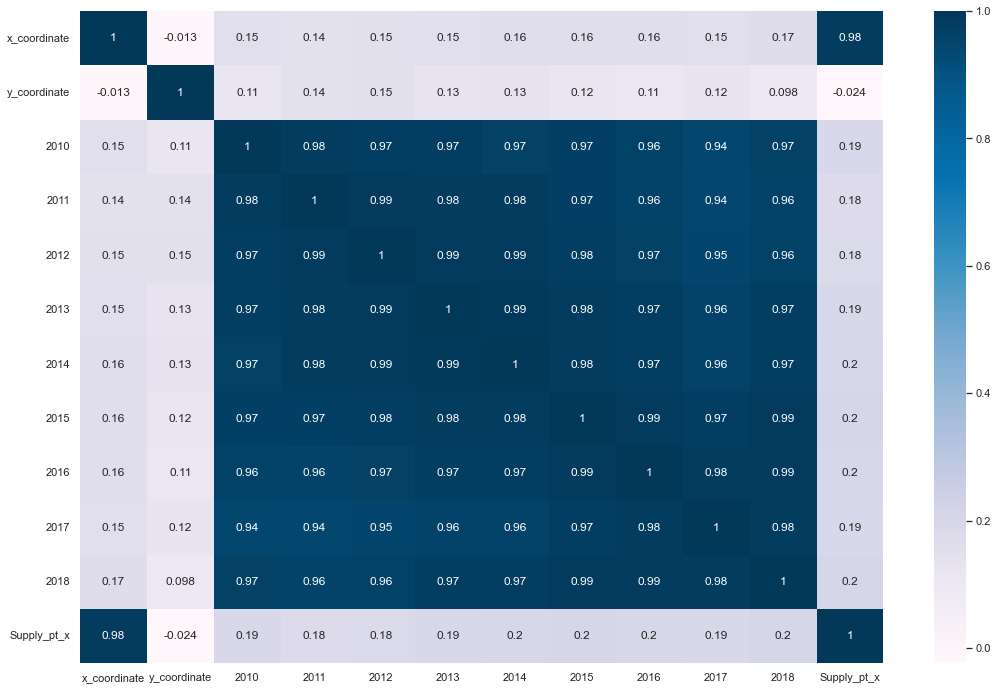

In [62]:
plt.figure(figsize=(18,12))
sns.heatmap(DemandH_train.corr(), annot=True, cmap='PuBu')
plt.show()

### Dividing into X and Y sets for the model building

In [63]:
DemandH_train_m = DemandH_train.copy() #Create a copy of the training data for Auto model as '_m'
y_train = DemandH_train_m.pop('2018')
X_train = DemandH_train_m

In [64]:
X_train.head()

,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,Supply_pt_x
3159,0.365079,0.777778,0.846563,0.846405,0.854188,0.865950,0.748076,0.770462,0.681851,0.532171,22.771807
3807,0.492063,0.936508,0.167398,0.164677,0.214612,0.213719,0.195574,0.193093,0.143788,0.118998,32.508201
3689,0.650794,0.904762,0.782881,0.634330,0.632133,0.635351,0.674863,0.737967,0.714725,0.699465,40.255319
1903,0.746032,0.460317,0.788417,0.790567,0.769476,0.927837,0.798811,0.784561,0.746879,0.738821,49.129008
500,0.825397,0.111111,0.118619,0.102975,0.100435,0.087365,0.124737,0.128558,0.122613,0.106314,52.218438


## Building model using RFE 
    - Recursive Feature Elimination Model

In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('x_coordinate', False, 2),
 ('y_coordinate', False, 2),
 ('2010', True, 1),
 ('2011', False, 2),
 ('2012', False, 2),
 ('2013', False, 2),
 ('2014', True, 1),
 ('2015', True, 1),
 ('2016', True, 1),
 ('2017', True, 1),
 ('Supply_pt_x', False, 2)]

In [68]:
#List the columns that are of signifance 
col = X_train.columns[rfe.support_]
col

Index(['2010', '2014', '2015', '2016', '2017'], dtype='object')

In [69]:
#List the columns that are of less signifance 
X_train.columns[~rfe.support_]

Index(['x_coordinate', 'y_coordinate', '2011', '2012', '2013', 'Supply_pt_x'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [70]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [71]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [72]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [73]:
#Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   2018   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.650e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:59:33   Log-Likelihood:                 5872.5
No. Observations:                2867   AIC:                        -1.173e+04
Df Residuals:                    2861   BIC:                        -1.170e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0171      0.001     19.424      0.0

### Checking VIF

In [74]:
X_train_rfe.columns

Index(['const', '2010', '2014', '2015', '2016', '2017'], dtype='object')

In [75]:
X_train_ref_1 = X_train_rfe.drop(["const"], axis = 1) 
X_train_ref_1 = X_train_rfe.drop(["2014"], axis = 1) 

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = pd.DataFrame()
X = X_train_ref_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,2016,60.03
2,2015,57.09
4,2017,27.92
1,2010,17.60
0,const,2.22


In [78]:
#X_train_ref_1 = X_train_ref_1.drop(["const"], axis = 1) 
#X_train_ref_1 = X_train_ref_1.drop(["2014"], axis = 1) 
X_train_ref_lm = sm.add_constant(X_train_ref_1)

In [79]:
lm = sm.OLS(y_train,X_train_ref_lm).fit()   # Running the linear model

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2018   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.562e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:59:33   Log-Likelihood:                 5872.1
No. Observations:                2867   AIC:                        -1.173e+04
Df Residuals:                    2862   BIC:                        -1.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0170      0.001     19.522      0.000       0.015       0.019
2010           0.1329      0.009     15.196      0.000       0.116       0.150
2015           0.2663      0.017     16.090      0.000       0.234       0.299
2016           0.2028      0.017     12.075      0.000       0.170       0.236
2017           0.3538      0.012     28.918      0.000       0.330       0.378
==============================================================================
Omnibus:                      156.012   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.867
Skew:                           0.097   Prob(JB):                    3.66e-128
Kurtosis:                       5.208   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ## Residual Analysis of the train data

In [81]:
y_train_cnt = lm.predict(X_train_ref_lm)

Text(0.5, 0, 'Errors')

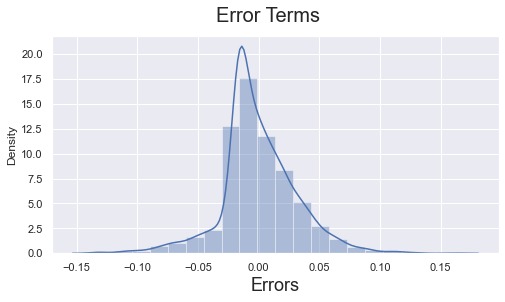

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making the Prediction

In [83]:
# Apply scaler() to all the needed predictor varibales and the target variable
num_vars = ['x_coordinate', 'y_coordinate', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


#bikes_test[num_vars] = scaler.fit_transform(bikes_test[num_vars])
DemandH_test[num_vars] = scaler.fit_transform(DemandH_test[num_vars])

In [84]:
DemandH_test.describe()

,x_coordinate,y_coordinate,2010,2011,2012,2013,2014,2015,2016,2017,2018,Supply_pt_x
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,0.497798,0.488047,0.299624,0.271035,0.266123,0.297457,0.286362,0.303217,0.265599,0.266511,0.283569,31.076766
std,0.291069,0.292537,0.279222,0.272057,0.270437,0.294000,0.281162,0.284128,0.254583,0.270116,0.255570,17.324647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064819
25%,0.238095,0.222222,0.076488,0.065415,0.060348,0.071996,0.065525,0.080225,0.073470,0.083245,0.086818,16.703231
50%,0.507937,0.476190,0.173759,0.140307,0.133313,0.154350,0.160336,0.173389,0.144471,0.130833,0.177918,32.508201
75%,0.746032,0.746032,0.554971,0.470307,0.471992,0.533418,0.499763,0.562802,0.494303,0.480524,0.499842,47.827777
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.568010


In [85]:
DemandH_test_1 = DemandH_test.copy()
y_test = DemandH_test_1.pop('2018')
X_test = DemandH_test_1

In [86]:
print (X_test.shape)
print (DemandH_test.shape)

(1229, 11)
(1229, 12)


In [87]:
X_train_ref_1.columns

Index(['const', '2010', '2015', '2016', '2017'], dtype='object')

In [88]:
X_train_ref_1 = X_train_ref_1.drop(["const"], axis = 1) 

In [89]:
X_train_ref_1.columns

Index(['2010', '2015', '2016', '2017'], dtype='object')

In [90]:
# Using the model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_ref_1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [91]:
X_test_new.shape

(1229, 5)

In [92]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

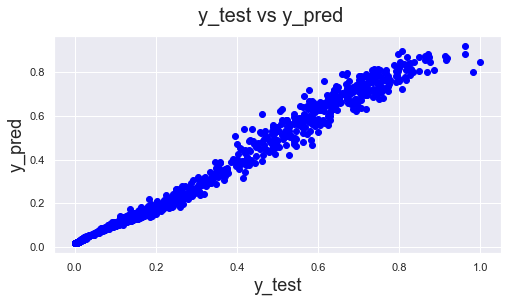

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred, color = "blue")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label
plt.show()

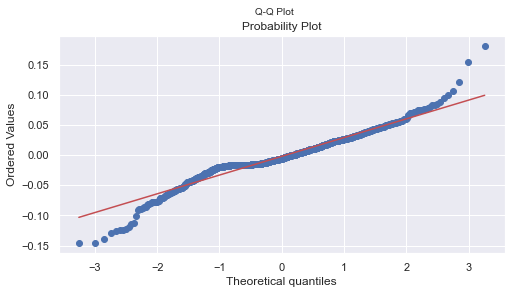

In [94]:
# Q-Q Plot on the residual
residual = y_test - y_pred
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle('Q-Q Plot', fontsize = 10) 
sp.stats.probplot(residual, plot=ax, fit=True);

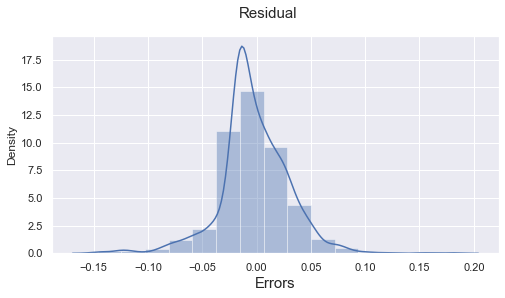

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 15)
fig.suptitle('Residual', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15);                         # X-label

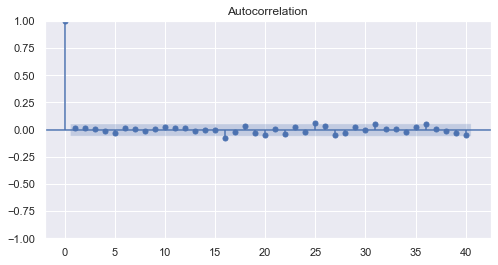

In [96]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

In [97]:
#RMSE value
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.03195015518137996

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9843584706086947

### Perfect R2_Score :) 